# MEDIAR Prediction Tutorial

This tutorial guides how to conduct prediction using pretrained models with MEDIAR pipeline. Note that this is a inline version of running `predict.py` in MEDIAR repo.



---


## 1. Setup

Clone Github repository and install dependencies. (Note: one may have to run this cell once, then restart the kernel, then run it again)

In [ ]:
# Clone MEDIAR github repo
!git clone https://github.com/CS-433/ml-project-2-doughminators.git
%rm -rf ./sample_data
%cd ml-project-2-doughminators/

# # Install dependencies
%pip install -r requirements.txt
%pip install segmentation-models-pytorch==0.3.1
%pip install wandb
!wandb off



---


### 2. Load model from google drive


In [9]:
%mkdir weights
!gdown https://drive.google.com/file/d/1yrLncA-wf594qKAE43o3BDP-Za7S1YV0/view?usp=sharing --fuzzy -O weights/

Downloading...
From: https://drive.google.com/uc?id=1yrLncA-wf594qKAE43o3BDP-Za7S1YV0
To: /content/ml-project-2-doughminators/weights/ft_from_phase2_on_YeaZ_40_epochs.pth.zip
100% 450M/450M [00:02<00:00, 199MB/s]


In [12]:
import zipfile
with zipfile.ZipFile("./weights/ft_from_phase2_on_YeaZ_40_epochs.pth.zip", 'r') as zip_ref:
    zip_ref.extractall("./weights")

In [13]:
model_path = "./weights/ft_from_phase2_on_YeaZ_40_epochs.pth"

import torch
weights = torch.load(model_path, map_location="cpu")

We load weights on the model.

In [14]:
import torch
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from train_tools import *
from train_tools.models import MEDIARFormer
from core.MEDIAR import Predictor

model_args = {
    "classes": 3,
    "decoder_channels": [1024, 512, 256, 128, 64],
    "decoder_pab_channels": 256,
    "encoder_name": 'mit_b5',
    "in_channels": 3
}

model = MEDIARFormer(**model_args)
model.load_state_dict(weights, strict=False)

Downloading: "https://github.com/qubvel/segmentation_models.pytorch/releases/download/v0.0.2/mit_b5.pth" to /root/.cache/torch/hub/checkpoints/mit_b5.pth


  0%|          | 0.00/313M [00:00<?, ?B/s]

<All keys matched successfully>



---



### 3. Load Example Data

Note that these come from the NeurIPS Challenge data.

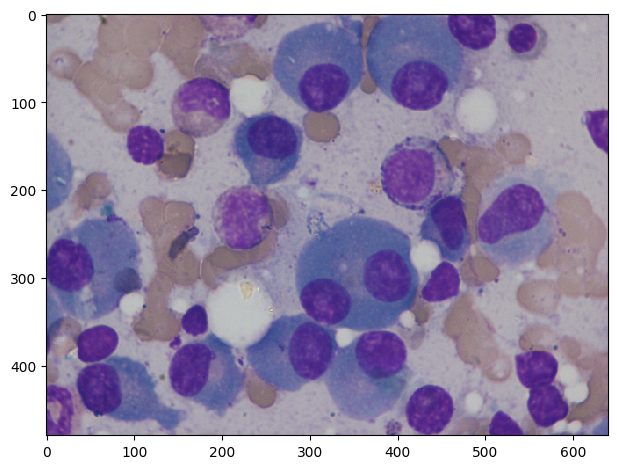

In [15]:
input_path = "./image/examples"

img1 = io.imread(f"{input_path}/img1.tiff")
io.imshow(img1)

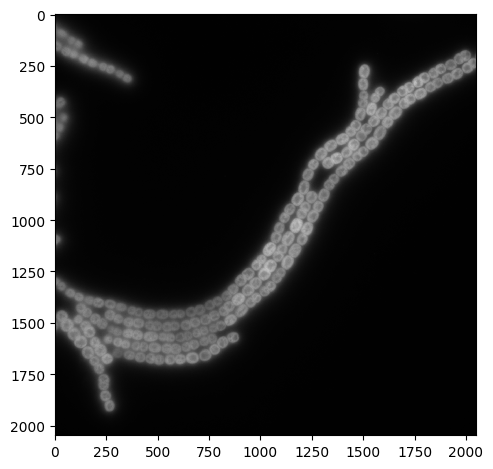

In [17]:
img2 = io.imread(f"{input_path}/img2.tif")
io.imshow(img2)



---



### 4. Prediction on example images

In [18]:
output_path = "results"

predictor = Predictor(model, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
_ = predictor.conduct_prediction()


Prediction finished: img1.tiff; img size = torch.Size([1, 3, 480, 640]); costing: 1.50s
Prediction finished: img2.tif; img size = torch.Size([1, 3, 2048, 2048]); costing: 11.26s

 Total Time Cost: 12.76s


Visualize the predicted masks.

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)



32 Cells detected!


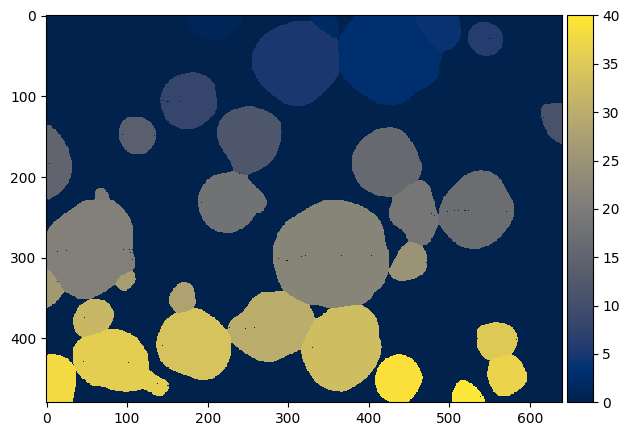

In [19]:
pred1 = io.imread(f"./{output_path}/img1_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


200 Cells detected!


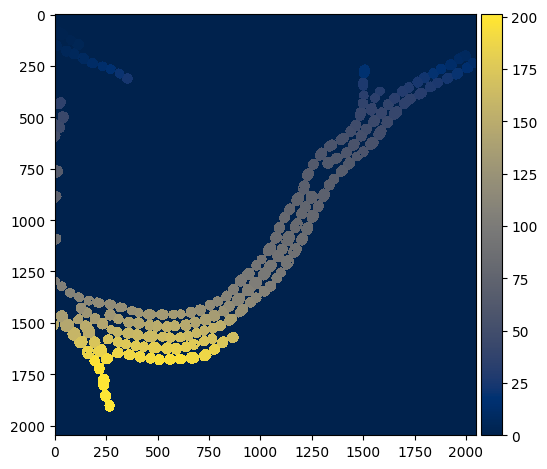

In [20]:
pred2 = io.imread(f"./{output_path}/img2_label.tiff")
io.imshow(pred2, cmap="cividis")

cell_count = len(np.unique(pred2))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")

Note: we cannot explicitely show performance on YeaZ data as the dataset is not published yet.



---